# Importing the necessary libraries

In [230]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import Accuracy

# Importing and exploring data

In [231]:
df = pd.read_csv(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\bank-full.csv')

In [232]:
df.head(-10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no


In [233]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Data preprocessing

In [235]:
# The null values are replaced by 'unknown' in the given data. Finding the number of unknowns in a column.
for i in df.columns:
    if 'unknown' in df[i].unique():
        check = df[i].value_counts().unknown
        print(i,check)

job 288
education 1857
contact 13020
poutcome 36959


<ipython-input-235-c78ab41cc519>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[i].unique():


In [236]:
#Converting the duration in seconds to minutes.
df['duration'] = df['duration']/60
df.drop(['contact','poutcome'],axis = 1,inplace = True)

<AxesSubplot:xlabel='y', ylabel='count'>

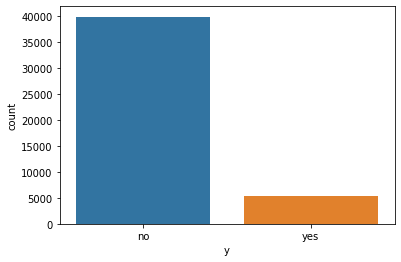

In [237]:
# Counting the number of values in each class
sns.countplot(x="y", data=df)

# Feature Selection

In [238]:
# Categorical and Continous features are seperated
x_cont = list(df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')])
x_cat = list(df.columns[df.dtypes == 'object'])
x_cat.remove('y')

In [239]:
#ANOVA feature selection for continous features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
print(x_cont)
f_stat, p_val = f_classif(df[x_cont],df['y'])
anova = pd.DataFrame()
anova['Features'] = x_cont
anova['f_stat'] = f_stat
anova['p_val'] = p_val
anova.sort_values(by = 'f_stat',ascending = False,inplace = True)
# kbest = SelectKBest(k=3)
# kbest.fit(df[x_cont],df['y'])
# kbest_features = x_cont[kbest.get_support()]
# print(kbest_features)
anova

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,Features,f_stat,p_val
3,duration,8333.761148,0.000000e+00
5,pdays,490.696563,3.790553e-108
6,previous,396.443989,7.801830e-88
4,campaign,243.358404,1.012347e-54
1,balance,126.572276,2.521114e-29
2,day,36.359010,1.653880e-09
0,age,28.625233,8.825644e-08


In [240]:
for i in x_cat:
    print(i,df[i].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [241]:
#Logical label encoding
df['job'] = df['job'].replace(['unemployed','unknown','student','housemaid','self-employed','technician','entrepreneur','blue-collar','management'  
  ,'admin.','services','retired'],[0,1,2,3,4,5,6,7,8,9,10,11])
df['marital'] = df['marital'].replace(['single','married','divorced'],[0,1,2])
df['education'] = df['education'].replace(['unknown','primary','secondary','tertiary'],[0,1,2,3])
df['default'] = df['default'].replace(['no','yes'],[0,1])
df['housing'] = df['housing'].replace(['no','yes'],[0,1])
df['loan'] = df['loan'].replace(['no','yes'],[0,1])
df['month'] = df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[0,1,2,3,4,5,6,7,8,9,10,11])
df['y'] = df['y'].replace(['no','yes'],[0,1])

In [242]:
#Chi2 test for categorical variables
from sklearn.feature_selection import chi2
chi2_score, p_value = chi2(df[x_cat],df['y'])
print(chi2_score)
chi2 = pd.DataFrame()
chi2['Features'] = x_cat
chi2['chi2_score'] = chi2_score
chi2['p_value'] = p_value
chi2.sort_values(by = 'chi2_score',ascending = False,inplace = True)
chi2

[5.17028911e-02 4.17633070e+01 3.50694687e+01 2.23138750e+01
 3.88949715e+02 1.76516137e+02 1.78516217e+01]


,Features,chi2_score,p_value
4,housing,388.949715,1.401285e-86
5,loan,176.516137,2.793375e-40
1,marital,41.763307,1.030187e-10
2,education,35.069469,3.181501e-09
3,default,22.313875,2.315277e-06
6,month,17.851622,2.388157e-05
0,job,0.051703,8.201262e-01


# Visualization

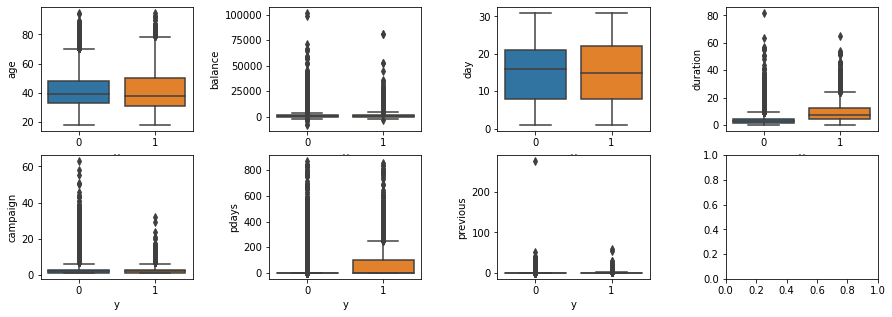

In [243]:
# Exploring continous features
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(x_cont):
    sns.boxplot(y=col, x='y', data=df, ax=axes[i])

<AxesSubplot:xlabel='previous', ylabel='Count'>

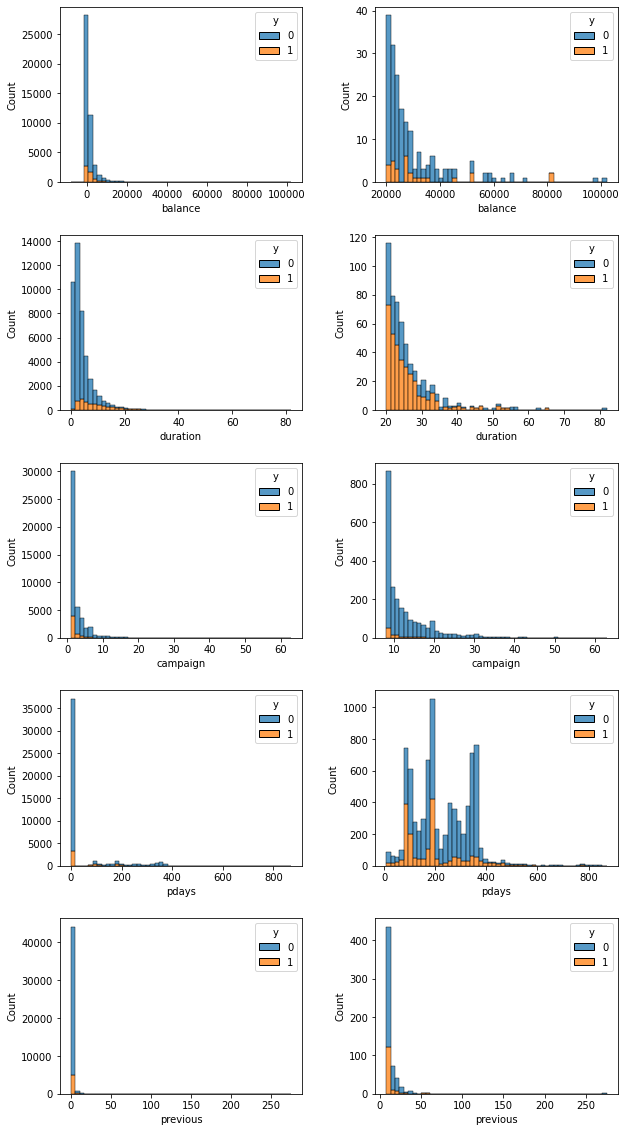

In [244]:
#Log-transform visualization of continous data with high outliers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
fig.subplots_adjust(hspace =.3, wspace=.3)
#Balance
sns.histplot(data=df,x="balance",hue="y",bins=50,multiple="stack",ax=axes[0,0])
check = df[df['balance']>20000]
sns.histplot(data=check,x="balance",hue="y",bins=50,multiple="stack",ax = axes[0,1])
#Duration
sns.histplot(data=df,x="duration",hue="y",bins=50,multiple="stack",ax = axes[1,0])
check = df[df['duration']>20]
sns.histplot(data=check,x="duration",hue="y",bins=50,multiple="stack",ax = axes[1,1])
#Campaign
sns.histplot(data=df,x="campaign",hue="y",bins=50,multiple="stack",ax = axes[2,0])
check = df[df['campaign']>7]
sns.histplot(data=check,x="campaign",hue="y",bins=50,multiple="stack",ax = axes[2,1])
#Pdays
sns.histplot(data=df,x="pdays",hue="y",bins=50,multiple="stack",ax = axes[3,0])
check = df[df['pdays']>7]
sns.histplot(data=check,x="pdays",hue="y",bins=50,multiple="stack",ax = axes[3,1])
#Previous
sns.histplot(data=df,x="previous",hue="y",bins=50,multiple="stack",ax = axes[4,0])
check = df[df['previous']>7]
sns.histplot(data=check,x="previous",hue="y",bins=50,multiple="stack",ax = axes[4,1])

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[x_cont] = scaler.fit_transform(df[x_cont])

In [246]:
X = df.drop(['y'],axis = 1)
print(X.shape,len(df['y']))
X.head(-5)

(45211, 14) 45211


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,0.519481,8,1,3,0,0.092259,1,0,0.133333,4,0.053070,0.000000,0.000000,0.000000
1,0.337662,5,0,2,0,0.073067,1,0,0.133333,4,0.030704,0.000000,0.000000,0.000000
2,0.194805,6,1,2,0,0.072822,1,1,0.133333,4,0.015453,0.000000,0.000000,0.000000
3,0.376623,7,1,0,0,0.086476,1,0,0.133333,4,0.018707,0.000000,0.000000,0.000000
4,0.194805,1,0,0,0,0.072812,0,0,0.133333,4,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,0.454545,8,1,3,0,0.078096,0,0,0.533333,10,0.045954,0.000000,0.212156,0.014545
45202,0.207792,9,0,2,0,0.077860,0,0,0.533333,10,0.045547,0.000000,0.000000,0.000000
45203,0.064935,2,0,3,0,0.073829,0,0,0.533333,10,0.054087,0.000000,0.000000,0.000000
45204,0.714286,11,1,2,0,0.098678,0,0,0.533333,10,0.061000,0.000000,0.047018,0.029091


In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,df['y'])

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [249]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9852  153]
 [1040  258]]
0.8944528001415554


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [250]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9707  298]
 [ 777  521]]
0.9048925064142264


In [251]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10005     0]
 [ 1298     0]]
0.8851632310006193


In [252]:
### Model architecture
model = Sequential([
    Dense(units = 28, input_shape = (14,), activation = 'relu'),
    BatchNormalization(),
    Dense(units = 56, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 28, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 28)                420       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28)                112       
_________________________________________________________________
dense_17 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_18 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 29        
Total params: 3,781
Trainable params: 3,725
Non-trainable params: 56
_________________________________________________________________


In [253]:
### Compiling the model and keeping a track of the losses.
model.compile(optimizer=SGD(learning_rate=0.02,momentum = 0.9), loss='BinaryCrossentropy', metrics = ['Accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=60,verbose=2,validation_split=0.2,batch_size=250)

Epoch 1/60
109/109 - 1s - loss: 0.9071 - accuracy: 0.0000e+00 - val_loss: 0.6922 - val_accuracy: 0.0000e+00
Epoch 2/60
109/109 - 0s - loss: 0.5673 - accuracy: 0.0000e+00 - val_loss: 0.4939 - val_accuracy: 0.0000e+00
Epoch 3/60
109/109 - 0s - loss: 0.4313 - accuracy: 0.0000e+00 - val_loss: 0.4163 - val_accuracy: 0.0000e+00
Epoch 4/60
109/109 - 0s - loss: 0.3793 - accuracy: 0.0000e+00 - val_loss: 0.3845 - val_accuracy: 0.0000e+00
Epoch 5/60
109/109 - 0s - loss: 0.3557 - accuracy: 0.0000e+00 - val_loss: 0.3757 - val_accuracy: 0.0000e+00
Epoch 6/60
109/109 - 0s - loss: 0.3279 - accuracy: 0.0000e+00 - val_loss: 0.3952 - val_accuracy: 0.0000e+00
Epoch 7/60
109/109 - 0s - loss: 0.3073 - accuracy: 0.0000e+00 - val_loss: 0.3889 - val_accuracy: 0.0000e+00
Epoch 8/60
109/109 - 0s - loss: 0.3046 - accuracy: 0.0000e+00 - val_loss: 0.3184 - val_accuracy: 0.0000e+00
Epoch 9/60
109/109 - 0s - loss: 0.2952 - accuracy: 0.0000e+00 - val_loss: 0.6526 - val_accuracy: 0.0000e+00
Epoch 10/60
109/109 - 0s - l

In [254]:
### Evaluating and predicting the test dataset.
model.evaluate(x=x_test,y=y_test)
pred = model.predict(x_test)
y_pred = [0 if pred[i]<0.5 else 1 for i in range(len(pred))]
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

354/354 [==============================] - 0s 572us/step - loss: 0.2879 - accuracy: 0.0000e+00
[[9576  429]
 [ 838  460]]
0.8879058656993718


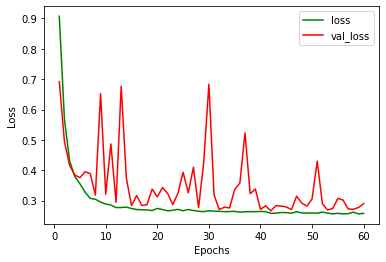

In [255]:
### Loss vs epochs to analyse the gradient descent alogoithm.
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,61)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [256]:
X = df.drop(['age','day','job','month','y'],axis = 1)
X.head()

,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous
0,1,3,0,0.092259,1,0,0.053070,0.0,0.0,0.0
1,0,2,0,0.073067,1,0,0.030704,0.0,0.0,0.0
2,1,2,0,0.072822,1,1,0.015453,0.0,0.0,0.0
3,1,0,0,0.086476,1,0,0.018707,0.0,0.0,0.0
4,0,0,0,0.072812,0,0,0.040260,0.0,0.0,0.0


In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,df['y'])

In [258]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9842  140]
 [1095  226]]
0.8907369724851809


In [259]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9634  348]
 [ 860  461]]
0.8931257188357073


In [260]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9982    0]
 [1321    0]]
0.883128372998319


In [261]:
### Model architecture
model = Sequential([
    Dense(units = 28, input_shape = (10,), activation = 'relu'),
    BatchNormalization(),
    Dense(units = 56, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 28, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 28)                308       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28)                112       
_________________________________________________________________
dense_21 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_22 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 29        
Total params: 3,669
Trainable params: 3,613
Non-trainable params: 56
_________________________________________________________________


In [262]:
### Compiling the model and keeping a track of the losses.
model.compile(optimizer=SGD(learning_rate=0.02,momentum = 0.9), loss='BinaryCrossentropy', metrics = ['Accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=60,verbose=2,validation_split=0.2,batch_size=250)

Epoch 1/60
109/109 - 1s - loss: 0.8958 - accuracy: 0.0000e+00 - val_loss: 0.6782 - val_accuracy: 0.0000e+00
Epoch 2/60
109/109 - 0s - loss: 0.5334 - accuracy: 0.0000e+00 - val_loss: 0.4694 - val_accuracy: 0.0000e+00
Epoch 3/60
109/109 - 0s - loss: 0.3905 - accuracy: 0.0000e+00 - val_loss: 0.3957 - val_accuracy: 0.0000e+00
Epoch 4/60
109/109 - 0s - loss: 0.3210 - accuracy: 0.0000e+00 - val_loss: 0.3128 - val_accuracy: 0.0000e+00
Epoch 5/60
109/109 - 0s - loss: 0.2947 - accuracy: 0.0000e+00 - val_loss: 0.2894 - val_accuracy: 0.0000e+00
Epoch 6/60
109/109 - 0s - loss: 0.2837 - accuracy: 0.0000e+00 - val_loss: 0.2744 - val_accuracy: 0.0000e+00
Epoch 7/60
109/109 - 0s - loss: 0.2818 - accuracy: 0.0000e+00 - val_loss: 0.2919 - val_accuracy: 0.0000e+00
Epoch 8/60
109/109 - 0s - loss: 0.2764 - accuracy: 0.0000e+00 - val_loss: 0.2780 - val_accuracy: 0.0000e+00
Epoch 9/60
109/109 - 0s - loss: 0.2760 - accuracy: 0.0000e+00 - val_loss: 0.2872 - val_accuracy: 0.0000e+00
Epoch 10/60
109/109 - 0s - l

In [263]:
### Evaluating and predicting the test dataset.
model.evaluate(x=x_test,y=y_test)
pred = model.predict(x_test)
y_pred = [0 if pred[i]<0.5 else 1 for i in range(len(pred))]
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

354/354 [==============================] - 0s 645us/step - loss: 0.2629 - accuracy: 0.0000e+00
[[9593  389]
 [ 851  470]]
0.8902946120498982


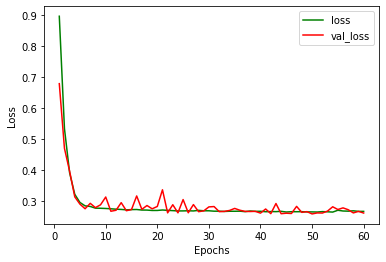

In [264]:
### Loss vs epochs to analyse the gradient descent alogoithm.
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,61)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()